In [ ]:
import os
os.environ['R_HOME'] = '/public/home/liuzj/softwares/anaconda3/envs/sc_py/lib/R'
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.ipython.html
rpy2.ipython.html.init_printing()
from jpy_tools.rTools import py2r, r2py, r_inline_plot, rHelp, trl, rSet, rGet, ad2so, so2ad, so2md, rcontext, Trl, r2py_re, py2r_re, RR, FR
from jpy_tools import loadPkl, toPkl
rBase = importr('base')
rUtils = importr('utils')
dplyr = importr('dplyr')
reticulate = importr('reticulate')
R = ro.r
T = Trl()
R("options(browser='firefox', shiny.port=6533, max.print=200)")
%load_ext rpy2.ipython

2023-06-25 19:50:08.973236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

<Figure size 72x72 with 0 Axes>

In [ ]:
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import marsilea as ma
import marsilea.plotter as mp
# plt.rcParams['figure.dpi'] = 150
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
sns.despine(top=True, right=True)
from itertools import product
from functools import reduce
import patchworklib as pw
from jpy_tools.otherTools import pwRecoverSeaborn, pwStack, F, pwShow
pw.show = pwShow
fc_recoverSns = pwRecoverSeaborn()
import seaborn.objects as so
from cycler import cycler
dt_snsStyle = {**sns.axes_style('ticks'), "legend.frameon": False, "axes.spines.top":False, "axes.spines.right":False, "axes.prop_cycle":cycler(color=['grey'])}

<Figure size 432x288 with 0 Axes>

In [ ]:
import scanpy as sc
import muon as mu
import pandas as pd
import numpy as np
import scipy.sparse as ss
from tqdm import tqdm
from jpy_tools.otherTools import F
from loguru import logger

In [ ]:
from jpy_tools import singleCellTools

Global seed set to 0
/public/home/liuzj/softwares/anaconda3/envs/sc_py/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/public/home/liuzj/softwares/anaconda3/envs/sc_py/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [ ]:
dir_temp = (
    "/data/Zhaijx/liuzj/projects/singleCell/02_jupyter/medicagoTruncatula/20220330/"
)

# load id convert table

In [ ]:
df_idV4AndV5 = pd.read_table(
    "/data/Zhaijx/liuzj/data/medtrA17_5/idconverter/20220812_CorrespondanceTables/20220812_CorrespondanceTables/JCVI-Mt4.0v2-gene.tsv"
)

In [ ]:
df_idV4AndV5.shape

(38908, 17)

In [ ]:
dt_idV4AndV5 = (
    df_idV4AndV5.loc[
        ~(
            df_idV4AndV5.duplicated("#objectA", keep=False)
            | df_idV4AndV5.duplicated("objectB", keep=False)
        )
    ]
    .set_index("#objectA")
    .rename(index=lambda x: x.replace("_", ""))["objectB"]
    .str.replace("Medtr", "MTR_")
    .to_dict()
)

# load mp data

In [ ]:
so_mp = R.readRDS(
    "/data/Zhaijx/liuzj/projects/singleCell/medicagoTruncatula/04_data/marc_libaut_mp/GSE210881_sNucRNA-seq_Medicago_integrated_root_atlas.rds"
)

2023-06-25 19:50:57 - WARNING - R[write to console]: Loading required package: SeuratObject

2023-06-25 19:50:57 - WARNING - R[write to console]: Loading required package: sp



In [ ]:
ad_mp = so2ad(so_mp, assay="RNA")
ad_mp.X = ad_mp.layers["RNA_counts"].copy()

2023-06-25 19:51:08 - WARNING - R[write to console]: 
Attaching package: ‘arrow’


2023-06-25 19:51:08 - WARNING - R[write to console]: The following object is masked from ‘package:utils’:

    timestamp


2023-06-25 19:51:10.886 | INFO     | jpy_tools.rTools:so2ad:578 - assay RNA: No variable features are calculated. Pass


In [ ]:
ad_mp

AnnData object with n_obs × n_vars = 28375 × 52709
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'ppod1ocol', 'integrated_snn_res.0.6', 'seurat_clusters'
    obsm: 'X_pca_integrated', 'X_umap_integrated'
    layers: 'RNA_counts', 'RNA_data'
    obsp: 'integrated_nn', 'integrated_snn'

In [ ]:
sc.pp.filter_genes(ad_mp, min_cells=1)

In [ ]:
del so_mp
R.gc()
import gc

gc.collect()

2222

In [ ]:
ad_mp.obsm["X_umap"] = ad_mp.obsm["X_umap_integrated"]

## rename according to the paper

... storing 'orig.ident' as categorical
... storing 'ppod1ocol' as categorical


<AxesSubplot: title={'center': 'seurat_clusters'}, xlabel='UMAP1', ylabel='UMAP2'>

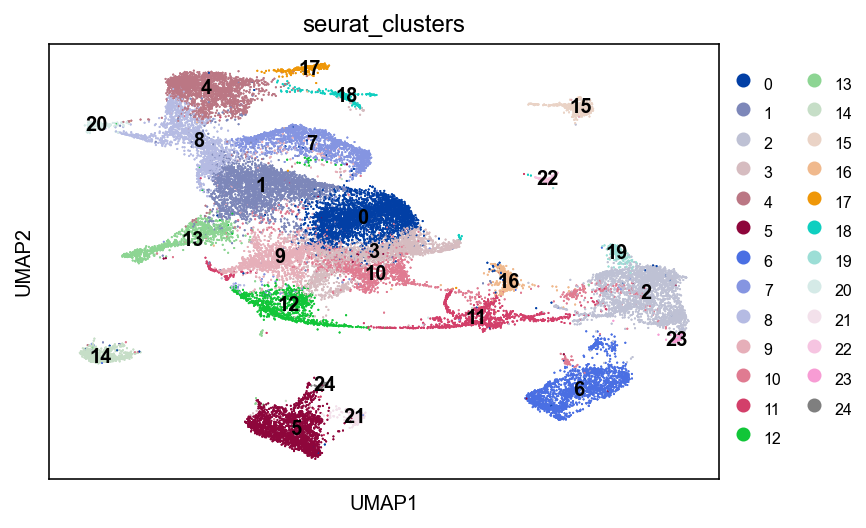

In [ ]:
ax = sc.pl.umap(ad_mp, color="seurat_clusters", show=False, legend_loc="on data")
sc.pl.umap(ad_mp, color="seurat_clusters", show=False, ax=ax)

In [ ]:
_dt = {
    "0": "12",
    "1": "13",
    "2": "21",
    "3": "10",
    "4": "1",
    "5": "17",
    "6": "20",
    "7": "14",
    "8": "2",
    "9": "11",
    "10": "6",
    "11": "9",
    "12": "7",
    "13": "15",
    "14": "16",
    "15": "25",
    "16": "8",
    "17": "5",
    "18": "4",
    "19": "23",
    "20": "3",
    "21": "18",
    "22": "24",
    "23": "22",
    "24": "19",
}
ad_mp.obs["cluster_name_in_paper"] = ad_mp.obs["seurat_clusters"].map(_dt).astype(str)

... storing 'cluster_name_in_paper' as categorical


<AxesSubplot: title={'center': 'cluster_name_in_paper'}, xlabel='UMAP1', ylabel='UMAP2'>

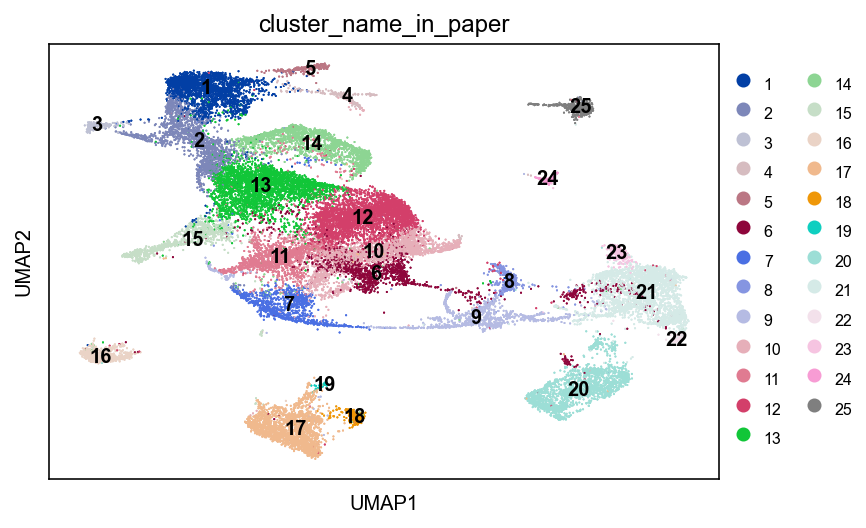

In [ ]:
ax = sc.pl.umap(ad_mp, color="cluster_name_in_paper", show=False, legend_loc="on data")
sc.pl.umap(ad_mp, color="cluster_name_in_paper", show=False, ax=ax)

In [ ]:
_dt = {
    "Epidermal cells": ["1", "2", "3", "4", "5"],
    "Cortical cells": ["6", "10", "11", "12", "13"],
    "Developing cortical cells": ["7"],
    "Stem cell niche": ["9"],
    "Mature cortical cells": ["14"],
    "Endodermal cells": ["15", "16", "17", "18", "19"],
    "Stele cells": ["20", "21", "22", "23", "24", "25"],
    "Unknown": ["8"],
} >> F(lambda x: {k: i for i, j in x.items() for k in j})
ad_mp.obs["celltype"] = ad_mp.obs["cluster_name_in_paper"].map(_dt)

... storing 'celltype' as categorical


<AxesSubplot: title={'center': 'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>

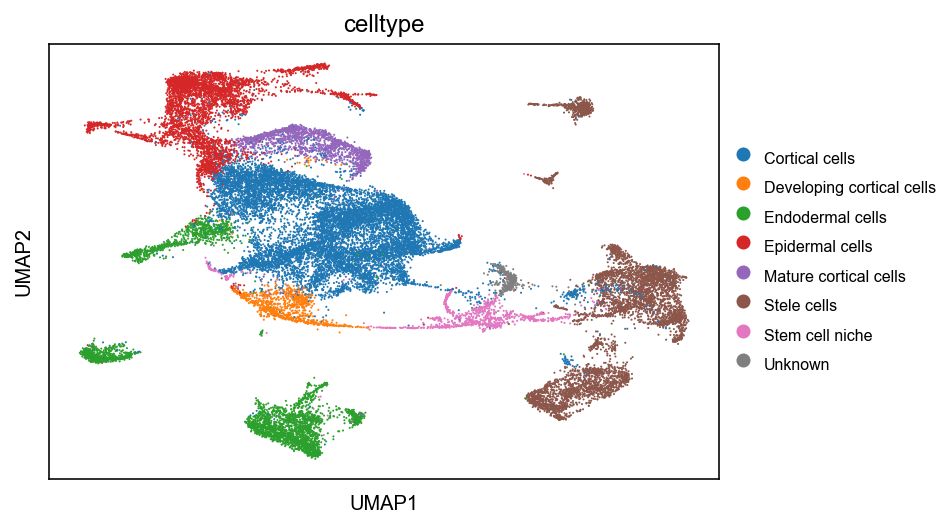

In [ ]:
# ax = sc.pl.umap(ad_mp, color="celltype", show=False, legend_loc="on data")
sc.pl.umap(ad_mp, color="celltype", show=False)

## convert id to v4 version

In [ ]:
ad_mp.raw = ad_mp

In [ ]:
ad_mp = ad_mp[:, ad_mp.var.index.isin(dt_idV4AndV5.keys())]

In [ ]:
ad_mp.var.index = ad_mp.var.index.map(dt_idV4AndV5)
ad_mp.var = ad_mp.var.copy()

In [ ]:
ad_mp.layers["raw"] = ad_mp.layers["RNA_counts"].copy()

In [ ]:
ad_mp.obs["source"] = "Cervantes-Pérez et al."

In [ ]:
ad_mp

AnnData object with n_obs × n_vars = 28375 × 21241
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'ppod1ocol', 'integrated_snn_res.0.6', 'seurat_clusters', 'cluster_name_in_paper', 'celltype', 'source'
    var: 'n_cells'
    uns: 'seurat_clusters_colors', 'cluster_name_in_paper_colors', 'celltype_colors'
    obsm: 'X_pca_integrated', 'X_umap_integrated', 'X_umap'
    layers: 'RNA_counts', 'RNA_data', 'raw'
    obsp: 'integrated_nn', 'integrated_snn'

# load our data

In [ ]:
ad = loadPkl(
    "ad_20230222_afterResponseGeneVs0hpi",
    lambda **dt: sc.read_h5ad(**dt),
    arg_path="filename",
    dir_path=dir_temp,
)

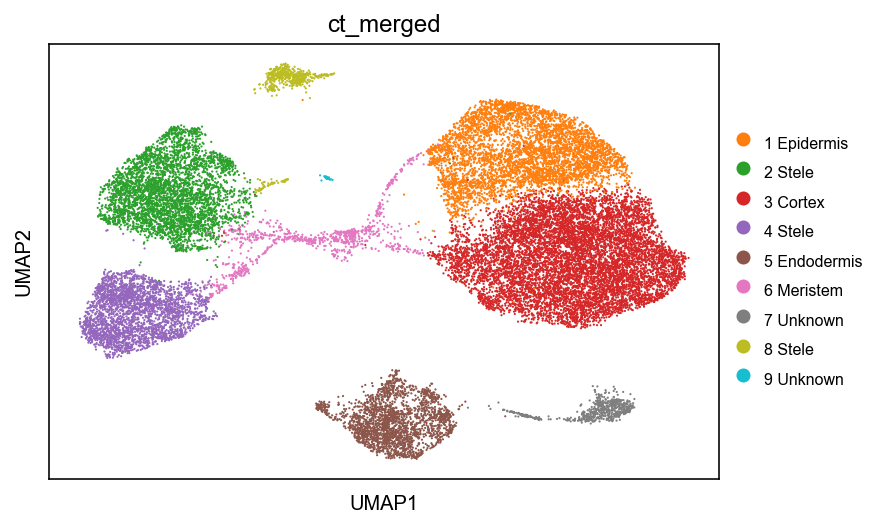

In [ ]:
sc.pl.umap(ad, color="ct_merged")

In [ ]:
ad.obs["hpt"] = ad.obs["Sample_4"].map(
    lambda x: "Control" if x == "0 hpi" else x.replace("hpi", "hpt")
)
ad.obs["orig.ident"] = ad.obs["hpt"]

In [ ]:
ad.obs["source"] = "Our data"

# integrated

In [ ]:
ad_twoSource = sc.concat([ad, ad_mp])

In [ ]:
singleCellTools.basic.initLayer(ad_twoSource, layer="raw")

In [ ]:
ad_twoSource

AnnData object with n_obs × n_vars = 53651 × 20845
    obs: 'orig.ident', 'source'
    uns: 'log1p'
    obsm: 'X_umap'
    layers: 'raw', 'normalize_log'

In [ ]:
sc.pp.highly_variable_genes(
    ad_twoSource,
    layer="raw",
    batch_key="orig.ident",
    n_top_genes=5000,
    flavor="seurat_v3",
)

In [ ]:
toPkl(ad_twoSource, "ad_twoSource", "scem")

2023-06-21 15:22:56.008 | INFO     | jpy_tools.otherTools:toPkl:476 - please run `loadPkl('ad_twoSource', lambda **dt:sc.read_h5ad(**dt), arg_path='filename')` to get object
... storing 'orig.ident' as categorical
... storing 'source' as categorical


0


In [ ]:
# scvi.model.SCVI.setup_anndata(ad_twoSource, layer='raw', batch_key='orig.ident', categorical_covariate_keys=['source'])
# scvi.settings.seed = 39
# scvi.settings.num_threads = 56
# model = scvi.model.SCVI(ad_twoSource, n_layers=4)
# model.train(early_stopping=True, batch_size=1024)


In [ ]:
ad_twoSource = loadPkl(
    "ad_twoSource", lambda **dt: sc.read_h5ad(**dt), arg_path="filename"
)

In [ ]:
sc.pp.neighbors(ad_twoSource, use_rep="X_scvi")
sc.tl.umap(ad_twoSource)

In [ ]:
ad_twoSource.obs.value_counts("source")

source
Cervantes-Pérez et al.    28375
Our data                  25276
dtype: int64

In [ ]:
import legendkit

In [ ]:
ad_twoSource.obs["source"] = (
    ad_twoSource.obs["source"]
    .astype("category")
    .cat.reorder_categories(["Our data", "Cervantes-Pérez et al."])
)

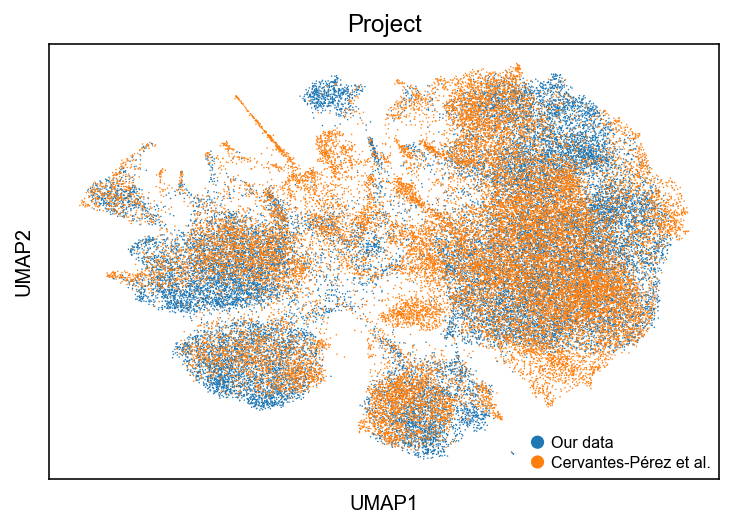

In [ ]:
ax = sc.pl.umap(
    ad_twoSource, color="source", show=False, legend_loc=None, title="Project"
)
legendkit.cat_legend(
    colors=["#1F77B4", "#ff7f0e"],
    labels=["Our data", "Cervantes-Pérez et al."],
    ax=ax,
    handle="circle",
    loc="lower right",
)
plt.show()

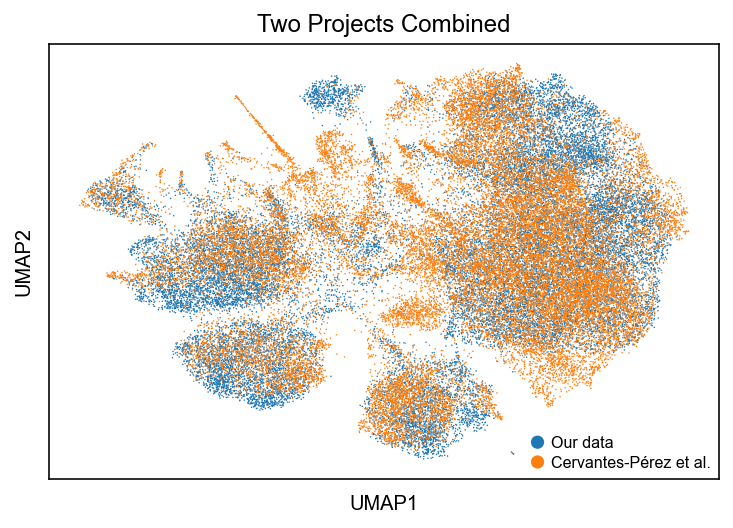

In [ ]:
ax = sc.pl.umap(
    ad_twoSource,
    color="source",
    show=False,
    legend_loc=None,
    title="Two Projects Combined",
)
legendkit.cat_legend(
    colors=["#1F77B4", "#ff7f0e"],
    labels=["Our data", "Cervantes-Pérez et al."],
    ax=ax,
    handle="circle",
    loc="lower right",
)
plt.show()

In [ ]:
ad_twoSource.obs["mp_cluster"] = ad_mp.obs.reindex(ad_twoSource.obs.index)[
    "cluster_name_in_paper"
]
ad_twoSource.obs["mp_celltype"] = ad_mp.obs.reindex(ad_twoSource.obs.index)["celltype"]
ad_twoSource.obs["our_celltype"] = ad.obs.reindex(ad_twoSource.obs.index)["ct_merged"]

In [ ]:
ad_twoSource.obs["our_mergeCelltype"] = (
    ad_twoSource.obs["our_celltype"].str.split(" ").str[-1]
)

In [ ]:
ad_twoSource.obs["our_mergeCelltype"] = (
    ad_twoSource.obs["our_mergeCelltype"]
    .astype("category")
    .cat.reorder_categories(
        ["Epidermis", "Cortex", "Endodermis", "Stele", "Meristem", "Unknown"]
    )
)

In [ ]:
_dt = {
    "Epidermis": ["1", "2", "3", "4", "5"],
    "Cortex": ["6", "7", "10", "11", "12", "13", "14"],
    "Meristem": ["9"],
    "Endodermis": ["15", "16", "17", "18", "19"],
    "Stele": ["20", "21", "22", "23", "24", "25"],
    "Unknown": ["8"],
} >> F(lambda x: {k: i for i, j in x.items() for k in j})
ad_twoSource.obs["mp_mergeCelltype"] = ad_twoSource.obs["mp_cluster"].map(_dt)

In [ ]:
ad_twoSource.obs["mp_mergeCelltype"] = (
    ad_twoSource.obs["mp_mergeCelltype"]
    .astype("category")
    .cat.reorder_categories(
        ["Epidermis", "Cortex", "Endodermis", "Stele", "Meristem", "Unknown"]
    )
)

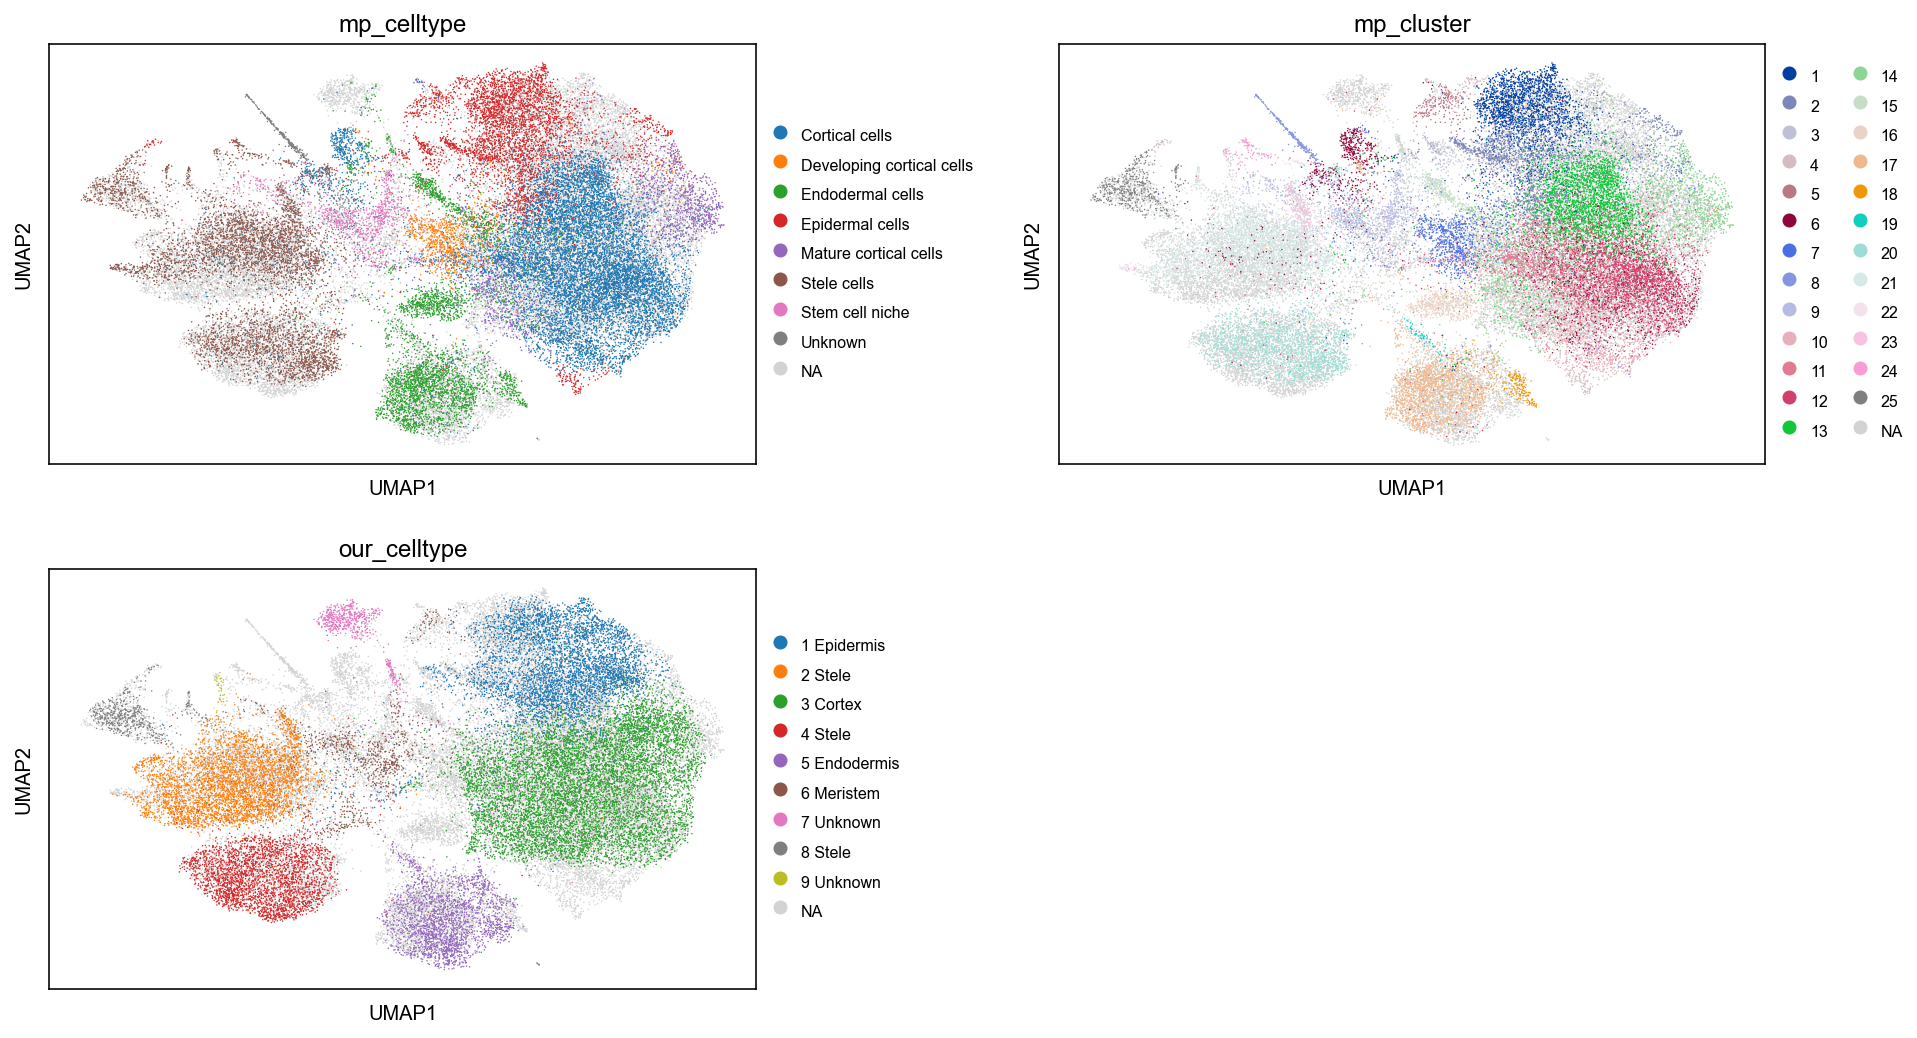

In [ ]:
sc.pl.umap(
    ad_twoSource,
    color=["mp_celltype", "mp_cluster", "our_celltype"],
    ncols=2,
    wspace=0.3,
)

AnnData object with n_obs × n_vars = 53651 × 20845
    obs: 'orig.ident', 'source', '_scvi_batch', '_scvi_labels', 'mp_cluster', 'mp_celltype', 'our_celltype', 'our_mergeCelltype', 'mp_mergeCelltype'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p', 'neighbors', 'umap', 'source_colors', 'mp_celltype_colors', 'mp_cluster_colors', 'our_celltype_colors'
    obsm: 'X_scvi', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'normalize_log', 'raw'
    obsp: 'distances', 'connectivities'

<ListLegend>

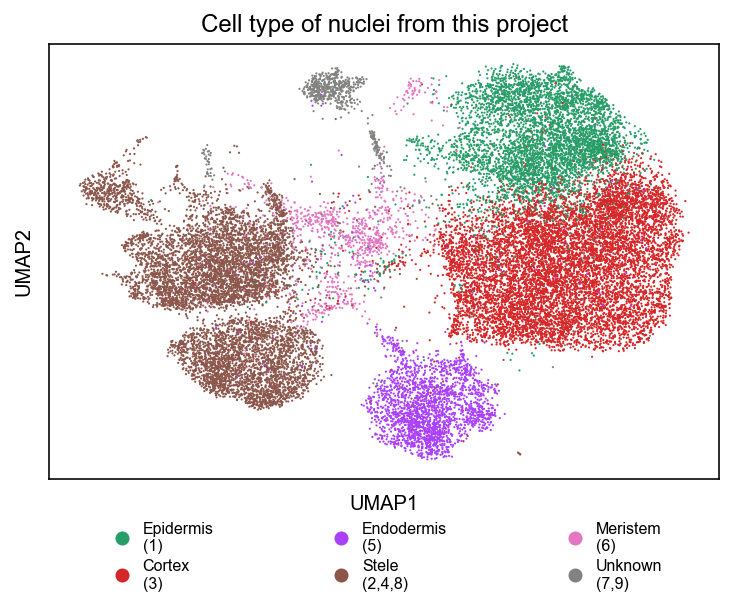

In [ ]:
ax = sc.pl.umap(
    ad_twoSource[ad_twoSource.obs.eval("source == 'Our data'")],
    color="our_mergeCelltype",
    title="Cell type of nuclei from this project",
    show=False,
    palette=["#279E68", "#D62728", "#AA40FC", "#8C564B", "#E377C2", "#828281"],
)
h, l = ax.get_legend_handles_labels()
l = [
    "Epidermis\n(1)",
    "Cortex\n(3)",
    "Endodermis\n(5)",
    "Stele\n(2,4,8)",
    "Meristem\n(6)",
    "Unknown\n(7,9)",
]
ax.get_legend().remove()
legendkit.legend(
    ax,
    handles=h,
    labels=l,
    loc="out lower center",
    scatteryoffsets=[0.27],
    deviation=0.08,
    ncol=3,
    columnspacing=7,
)

<ListLegend>

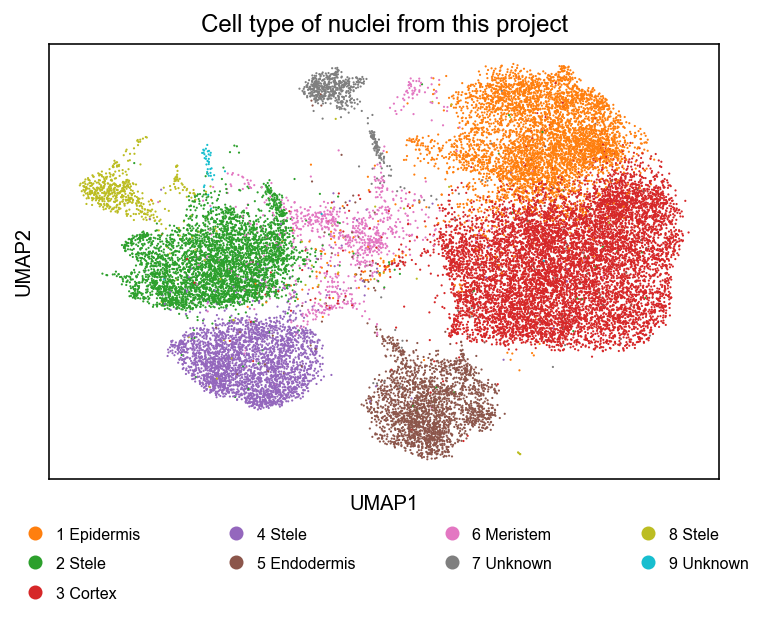

In [ ]:
ax = sc.pl.umap(
    ad_twoSource[ad_twoSource.obs.eval("source == 'Our data'")],
    color="our_celltype",
    title="Cell type of nuclei from this project",
    show=False,
    palette=ad.uns["ct_merged_colors"].tolist(),
)
h, l = ax.get_legend_handles_labels()
ax.get_legend().remove()
legendkit.legend(
    ax,
    handles=h,
    labels=l,
    loc="out lower center",
    scatteryoffsets=[0.27],
    deviation=0.08,
    ncol=4,
    columnspacing=5,
)

In [ ]:
ad_twoSource.obs["mp_cluster_ct"] = ad_twoSource.obs.apply(
    lambda x: np.nan if x.source == "Our data" else x.mp_cluster + " " + x.mp_celltype,
    axis=1,
)

<ListLegend>

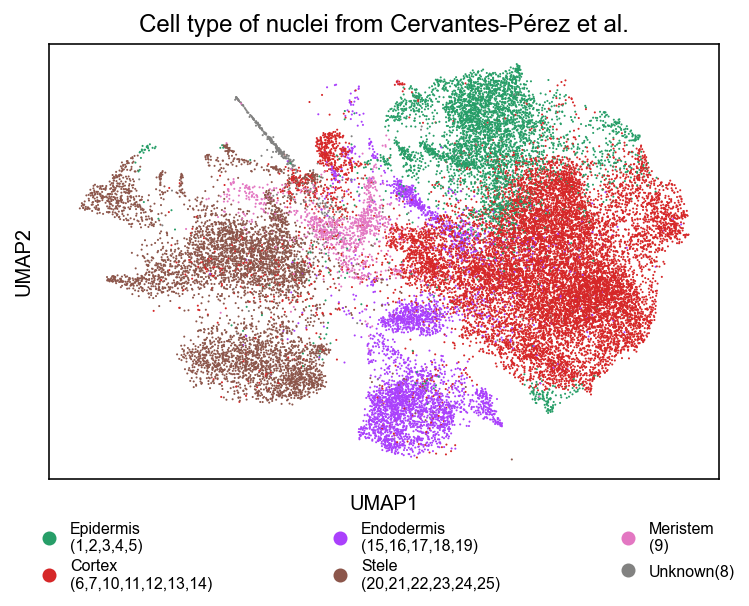

In [ ]:
ax = sc.pl.umap(
    ad_twoSource[ad_twoSource.obs.eval("source != 'Our data'")],
    color="mp_mergeCelltype",
    title="Cell type of nuclei from Cervantes-Pérez et al.",
    show=False,
    palette=["#279E68", "#D62728", "#AA40FC", "#8C564B", "#E377C2", "#828281"],
)
h, l = ax.get_legend_handles_labels()
l = [
    "Epidermis\n(1,2,3,4,5)",
    "Cortex\n(6,7,10,11,12,13,14)",
    "Endodermis\n(15,16,17,18,19)",
    "Stele\n(20,21,22,23,24,25)",
    "Meristem\n(9)",
    "Unknown(8)",
]
ax.get_legend().remove()
legendkit.legend(
    ax,
    handles=h,
    labels=l,
    loc="out lower center",
    scatteryoffsets=[0.27],
    deviation=0.08,
    ncol=3,
    columnspacing=7,
)

... storing 'mp_cluster_ct' as categorical


<ListLegend>

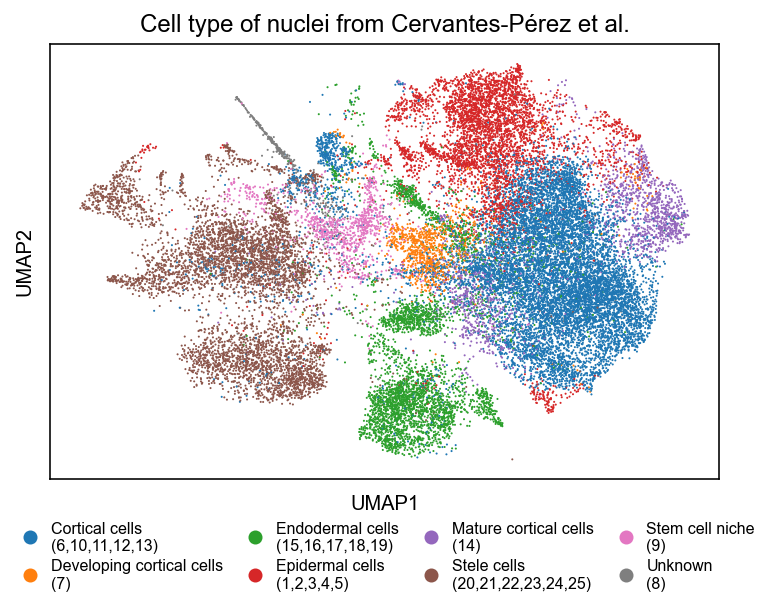

In [ ]:
ax = sc.pl.umap(
    ad_twoSource[ad_twoSource.obs.eval("source != 'Our data'")],
    color="mp_celltype",
    title="Cell type of nuclei from Cervantes-Pérez et al.",
    show=False,
)
h, l = ax.get_legend_handles_labels()
l = [
    "Cortical cells\n(6,10,11,12,13)",
    "Developing cortical cells\n(7)",
    "Endodermal cells\n(15,16,17,18,19)",
    "Epidermal cells\n(1,2,3,4,5)",
    "Mature cortical cells\n(14)",
    "Stele cells\n(20,21,22,23,24,25)",
    "Stem cell niche\n(9)",
    "Unknown\n(8)",
]
ax.get_legend().remove()
legendkit.legend(
    ax,
    handles=h,
    labels=l,
    loc="out lower center",
    scatteryoffsets=[0.27],
    deviation=0.08,
    ncol=4,
)

... storing 'mp_cluster_ct' as categorical


<ListLegend>

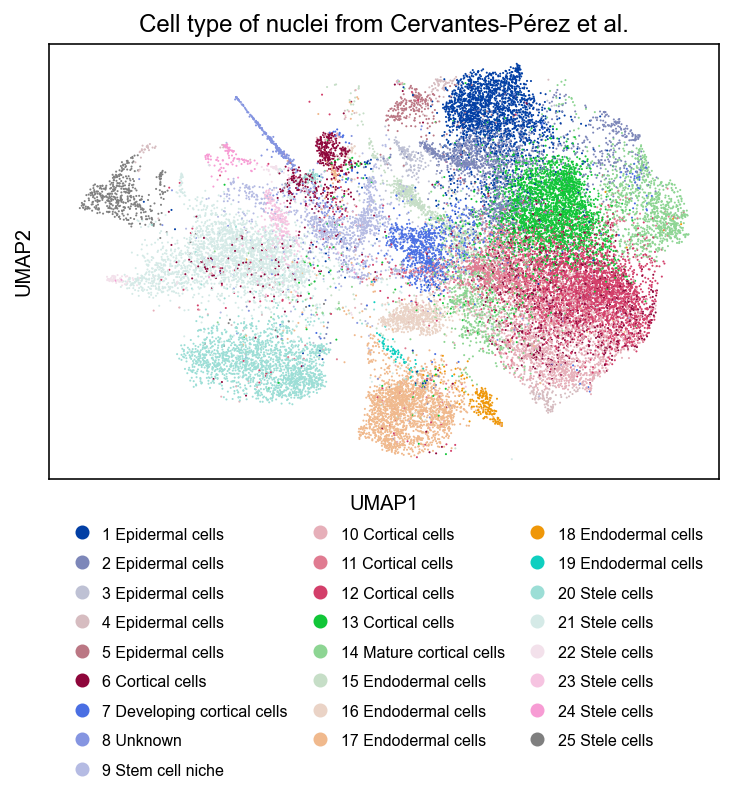

In [ ]:
ax = sc.pl.umap(
    ad_twoSource[ad_twoSource.obs.eval("source != 'Our data'")],
    color="mp_cluster_ct",
    title="Cell type of nuclei from Cervantes-Pérez et al.",
    show=False,
)
h, l = ax.get_legend_handles_labels()
ax.get_legend().remove()
legendkit.legend(
    ax,
    handles=h,
    labels=l,
    loc="out lower center",
    scatteryoffsets=[0.27],
    deviation=0.08,
    ncol=3,
)

# identify markers for mp data

In [ ]:
ad_mp.obs

orig.ident  nCount_RNA  nFeature_RNA  \
AAACCCAAGATGTAGT-1_1      medicago_mock1_spx      3588.0          2151   
AAACCCAAGGATACAT-1_1      medicago_mock1_spx      2229.0          1570   
AAACCCACAAGAGGTC-1_1      medicago_mock1_spx      1531.0          1192   
AAACCCAGTATGAGGC-1_1      medicago_mock1_spx      2463.0          1677   
AAACCCAGTCTGTAGT-1_1      medicago_mock1_spx      5907.0          2768   
...                                      ...         ...           ...   
TTTGTTGCATCACGGC-1_6  medicago_meliloti3_spx      2411.0          1520   
TTTGTTGCATGACAGG-1_6  medicago_meliloti3_spx      1380.0          1075   
TTTGTTGTCGGTGTAT-1_6  medicago_meliloti3_spx      1077.0           803   
TTTGTTGTCTAAACGC-1_6  medicago_meliloti3_spx      3433.0          1953   
TTTGTTGTCTGCTCTG-1_6  medicago_meliloti3_spx      1553.0          1218   

                      percent.mt               ppod1ocol  \
AAACCCAAGATGTAGT-1_1         0.0      medicago_mock1_spx   
AAACCCAAGGATACAT-1_1         0.0      medicago_mock1_spx   
AAACCCACAAGAGGTC-1_1         0.0      medicago_mock1_spx   
AAACCCAGTATGAGGC-1_1         0.0      medicago_mock1_spx   
AAACCCAGTCTGTAGT-1_1         0.0      medicago_mock1_spx   
...                          ...                     ...   
TTTGTTGCATCACGGC-1_6         0.0  medicago_meliloti3_spx   
TTTGTTGCATGACAGG-1_6         0.0  medicago_meliloti3_spx   
TTTGTTGTCGGTGTAT-1_6         0.0  medicago_meliloti3_spx   
TTTGTTGTCTAAACGC-1_6         0.0  medicago_meliloti3_spx   
TTTGTTGTCTGCTCTG-1_6         0.0  medicago_meliloti3_spx   

                     integrated_snn_res.0.6 seurat_clusters  \
AAACCCAAGATGTAGT-1_1                      6               6   
AAACCCAAGGATACAT-1_1                      1               1   
AAACCCACAAGAGGTC-1_1                      5               5   
AAACCCAGTATGAGGC-1_1                      4               4   
AAACCCAGTCTGTAGT-1_1                     13              13   
...                                     ...             ...   
TTTGTTGCATCACGGC-1_6                      6               6   
TTTGTTGCATGACAGG-1_6                      8               8   
TTTGTTGTCGGTGTAT-1_6                      4               4   
TTTGTTGTCTAAACGC-1_6                      3               3   
TTTGTTGTCTGCTCTG-1_6                      2               2   

                     cluster_name_in_paper          celltype  \
AAACCCAAGATGTAGT-1_1                    20       Stele cells   
AAACCCAAGGATACAT-1_1                    13    Cortical cells   
AAACCCACAAGAGGTC-1_1                    17  Endodermal cells   
AAACCCAGTATGAGGC-1_1                     1   Epidermal cells   
AAACCCAGTCTGTAGT-1_1                    15  Endodermal cells   
...                                    ...               ...   
TTTGTTGCATCACGGC-1_6                    20       Stele cells   
TTTGTTGCATGACAGG-1_6                     2   Epidermal cells   
TTTGTTGTCGGTGTAT-1_6                     1   Epidermal cells   
TTTGTTGTCTAAACGC-1_6                    10    Cortical cells   
TTTGTTGTCTGCTCTG-1_6                    21       Stele cells   

                                      source  
AAACCCAAGATGTAGT-1_1  Cervantes-Pérez et al.  
AAACCCAAGGATACAT-1_1  Cervantes-Pérez et al.  
AAACCCACAAGAGGTC-1_1  Cervantes-Pérez et al.  
AAACCCAGTATGAGGC-1_1  Cervantes-Pérez et al.  
AAACCCAGTCTGTAGT-1_1  Cervantes-Pérez et al.  
...                                      ...  
TTTGTTGCATCACGGC-1_6  Cervantes-Pérez et al.  
TTTGTTGCATGACAGG-1_6  Cervantes-Pérez et al.  
TTTGTTGTCGGTGTAT-1_6  Cervantes-Pérez et al.  
TTTGTTGTCTAAACGC-1_6  Cervantes-Pérez et al.  
TTTGTTGTCTGCTCTG-1_6  Cervantes-Pérez et al.  

[28375 rows x 10 columns]

In [ ]:
singleCellTools.geneEnrichInfo.calculateEnrichScoreByCellex(
    ad_mp, layer="raw", clusterName="cluster_name_in_paper"
)

In [ ]:
dt_mpSpecGenes = (
    ad_mp.uns["cluster_name_in_paper_cellexES"]
    .query("enrichScore > 0.8")
    .groupby("cluster_name_in_paper")["gene"]
    .agg(list)
    .rename(index=lambda x: "mp: " + x)
)

In [ ]:
dt_ourSpecGenes = (
    ad.uns["leiden_merged_cellexES"]
    .query("enrichScore > 0.8")
    .groupby("leiden_merged")["gene"]
    .agg(list)
)

In [ ]:
dt_specGenes = pd.concat([dt_ourSpecGenes, dt_mpSpecGenes])

In [ ]:
from itertools import product

df_specGeneOverlap = pd.DataFrame(index=dt_specGenes.index, columns=dt_specGenes.index)
for x, y in product(dt_specGenes.index, dt_specGenes.index):
    if x == y:
        df_specGeneOverlap.loc[x, y] = 0.0
    else:
        df_specGeneOverlap.loc[x, y] = len(
            set(dt_specGenes[x]) & set(dt_specGenes[y])
        ) / len(dt_specGenes[y])

In [ ]:
df_specGeneOverlap = df_specGeneOverlap.astype(float)

In [ ]:
_ls = ["7", "9", "mp: 8"]
df_specGeneOverlap = df_specGeneOverlap.loc[
    lambda x: ~x.index.isin(_ls), lambda x: ~x.index.isin(_ls)
]

In [ ]:
import marsilea as ma

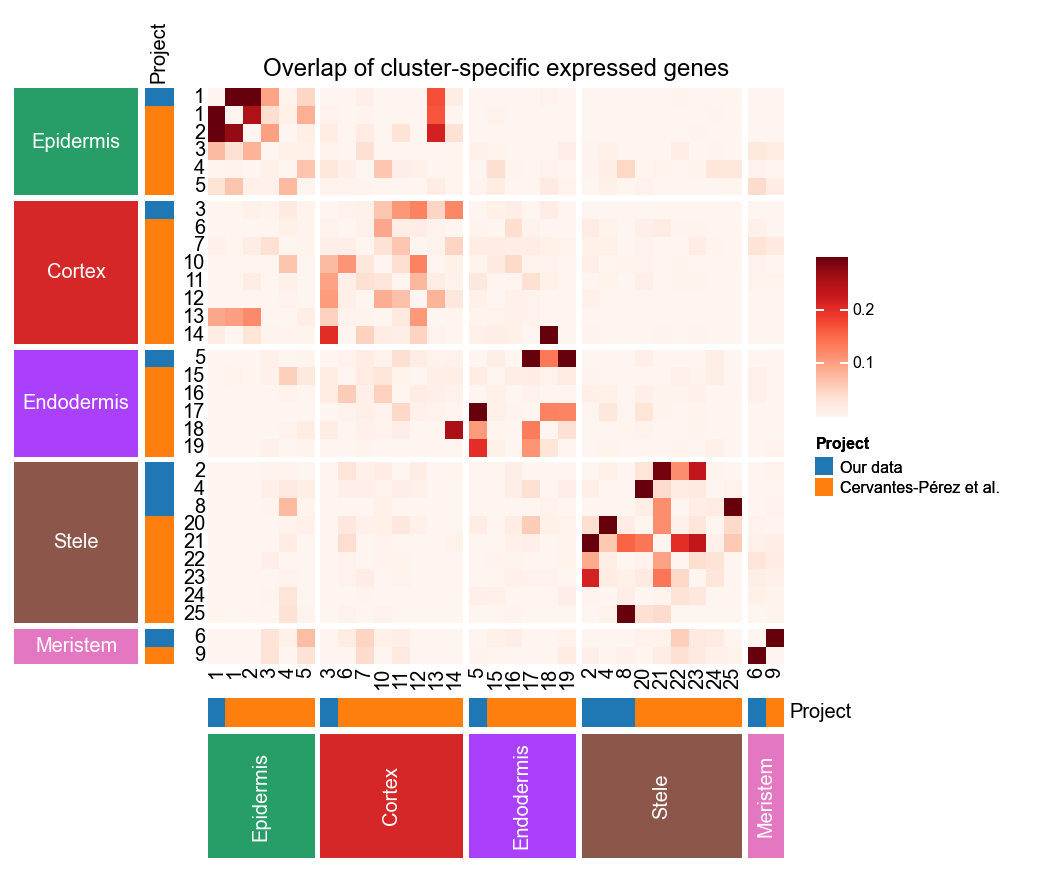

In [ ]:
h = ma.Heatmap(df_specGeneOverlap, cmap="Reds", name="overlap", vmax=0.3)

h.add_top(mp.Title("Overlap of cluster-specific expressed genes"))

ls_cluster = df_specGeneOverlap.index.map(lambda x: x.split(": ")[-1])
h.add_left(mp.Labels(ls_cluster, label="Cluster"))
h.add_bottom(mp.Labels(ls_cluster, label="Cluster"))

ls_source = ["Our data"] * 7 + ["Cervantes-Pérez et al."] * 24
h.add_left(
    mp.Colors(
        ls_source,
        palette={"Our data": "#1F77B4", "Cervantes-Pérez et al.": "#FF7F0E"},
        label="Project",
        label_loc="top",
    ),
    size=0.2,
    pad=0.05,
    name="a",
)
h.add_bottom(
    mp.Colors(
        ls_source,
        palette={"Our data": "#1F77B4", "Cervantes-Pérez et al.": "#FF7F0E"},
        label="Project",
    ),
    size=0.2,
    pad=0.05,
    name="b",
    legend=False,
)

ls_celltype = [
    "Epidermis",
    "Stele",
    "Cortex",
    "Stele",
    "Endodermis",
    "Meristem",
    "Stele",
    "Epidermis",
    "Epidermis",
    "Epidermis",
    "Epidermis",
    "Epidermis",
    "Cortex",
    "Cortex",
    "Meristem",
    "Cortex",
    "Cortex",
    "Cortex",
    "Cortex",
    "Cortex",
    "Endodermis",
    "Endodermis",
    "Endodermis",
    "Endodermis",
    "Endodermis",
    "Stele",
    "Stele",
    "Stele",
    "Stele",
    "Stele",
    "Stele",
]
h.hsplit(
    labels=ls_celltype,
    order=["Epidermis", "Cortex", "Endodermis", "Stele", "Meristem"],
)
h.vsplit(
    labels=ls_celltype,
    order=["Epidermis", "Cortex", "Endodermis", "Stele", "Meristem"],
)
h.add_left(
    mp.Chunk(
        ["Epidermis", "Cortex", "Endodermis", "Stele", "Meristem"],
        sc.pl.palettes.default_20[2:7],
        # props=dict(color="black"),
        rotation=0,
    ),
    pad=0.05,
)
h.add_bottom(
    mp.Chunk(
        ["Epidermis", "Cortex", "Endodermis", "Stele", "Meristem"],
        sc.pl.palettes.default_20[2:7],
        rotation=90,
    ),
    pad=0.05,
)


h.add_legends(order=["overlap", "a"])
h.render()

## gene all diff genes

In [ ]:
_lsDf = []
for i in range(1, 26):
    _df = (
        pd.read_excel(
            "/data/Zhaijx/liuzj/projects/singleCell/medicagoTruncatula/04_data/marc_libaut_mp/mmc2.xlsx",
            sheet_name=7,
            usecols=range(4 * i - 4, 4 * i) >> F(list),
            skiprows=2,
        )
        .dropna(how="all", axis=0)
        .assign(Cluster=f"{i}")
    )
    _lsDf.append(_df)

In [ ]:
_lsDf = [_df.rename(columns=lambda x: x.split(".")[0]) for _df in _lsDf]

In [ ]:
df_diffGeneMp = pd.concat(_lsDf, axis=0)

In [ ]:
df_diffGeneMp = df_diffGeneMp.assign(GeneV4=lambda x: x["Gene ID"].map(dt_idV4AndV5))

In [ ]:
df_diffGeneMpUp = df_diffGeneMp.query("`Log2 Fold Change` > 0")
df_diffGeneMpDown = df_diffGeneMp.query("`Log2 Fold Change` < 0")

In [ ]:
dt_mergeClusterForMp = {
    "Epidermis": ["1", "2", "3", "4", "5"],
    "Cortex": ["6", "7", "10", "11", "12", "13", "14"],
    "Meristem": ["9"],
    "Endodermis": ["15", "16", "17", "18", "19"],
    "Stele": ["20", "21", "22", "23", "24", "25"],
    "Unknown": ["8"],
} >> F(lambda x: {k: i for i, j in x.items() for k in j})

In [ ]:
df_diffGeneMpUpCellType = df_diffGeneMpUp.assign(
    celltype=lambda x: x["Cluster"].map(dt_mergeClusterForMp)
)

In [ ]:
df_diffGeneMpDownCellType = df_diffGeneMpDown.assign(
    celltype=lambda x: x["Cluster"].map(dt_mergeClusterForMp)
)

### for up

In [ ]:
df_responseGeneVersus0hpi = ad.uns["responseGenesVs0hpi"]

In [ ]:
import importlib

importlib.reload(singleCellTools.geneEnrichInfo)

<module 'jpy_tools.singleCellTools.geneEnrichInfo' from '/public1/software/liuzj/scripts/jModule/jpy_tools/singleCellTools/geneEnrichInfo.py'>

In [ ]:
ad.obs

Tissue  \
AAACCCAAGATGAATC-1_batch_control  5 COR*/EPI*   
AAACCCAAGTCCCGAC-1_batch_control       4 END*   
AAACCCACAAATACAG-1_batch_control        1 EPI   
AAACCCACAGGCACAA-1_batch_control       4 END*   
AAACCCAGTACGGTTT-1_batch_control        1 EPI   
...                                       ...   
TTTGGTTGTTTCGCTC-1_batch_nf_6           1 EPI   
TTTGTTGGTGAACCGA-1_batch_nf_6     5 COR*/EPI*   
TTTGTTGGTGATCATC-1_batch_nf_6     5 COR*/EPI*   
TTTGTTGTCCAAGCTA-1_batch_nf_6     5 COR*/EPI*   
TTTGTTGTCTCGTTTA-1_batch_nf_6           2 STE   

                                 labelTransfer_scanvi_celltype.anno  \
AAACCCAAGATGAATC-1_batch_control                             Cortex   
AAACCCAAGTCCCGAC-1_batch_control                         Endodermis   
AAACCCACAAATACAG-1_batch_control                       Atrichoblast   
AAACCCACAGGCACAA-1_batch_control                         Endodermis   
AAACCCAGTACGGTTT-1_batch_control                       Atrichoblast   
...                                                             ...   
TTTGGTTGTTTCGCTC-1_batch_nf_6                           Trichoblast   
TTTGTTGGTGAACCGA-1_batch_nf_6                          Atrichoblast   
TTTGTTGGTGATCATC-1_batch_nf_6                                Cortex   
TTTGTTGTCCAAGCTA-1_batch_nf_6                                Cortex   
TTTGTTGTCTCGTTTA-1_batch_nf_6                            Procambium   

                                 batch_time leiden  n_counts       __group  \
AAACCCAAGATGAATC-1_batch_control    control      0    1843.0      3 Cortex   
AAACCCAAGTCCCGAC-1_batch_control    control      5    2290.0  5 Endodermis   
AAACCCACAAATACAG-1_batch_control    control      1     670.0   1 Epidermis   
AAACCCACAGGCACAA-1_batch_control    control      5    4734.0  5 Endodermis   
AAACCCAGTACGGTTT-1_batch_control    control      1    1718.0   1 Epidermis   
...                                     ...    ...       ...           ...   
TTTGGTTGTTTCGCTC-1_batch_nf_6          nf_6      1    1151.0   1 Epidermis   
TTTGTTGGTGAACCGA-1_batch_nf_6          nf_6      3     855.0      3 Cortex   
TTTGTTGGTGATCATC-1_batch_nf_6          nf_6      0    1752.0      3 Cortex   
TTTGTTGTCCAAGCTA-1_batch_nf_6          nf_6      3    1191.0      3 Cortex   
TTTGTTGTCTCGTTTA-1_batch_nf_6          nf_6      2    1213.0       2 Stele   

                                 leiden_R orig.ident    specie  \
AAACCCAAGATGAATC-1_batch_control        0    Control  medicago   
AAACCCAAGTCCCGAC-1_batch_control        5    Control  medicago   
AAACCCACAAATACAG-1_batch_control      1,0    Control  medicago   
AAACCCACAGGCACAA-1_batch_control        5    Control  medicago   
AAACCCAGTACGGTTT-1_batch_control      1,0    Control  medicago   
...                                   ...        ...       ...   
TTTGGTTGTTTCGCTC-1_batch_nf_6         1,0      6 hpt  medicago   
TTTGTTGGTGAACCGA-1_batch_nf_6           3      6 hpt  medicago   
TTTGTTGGTGATCATC-1_batch_nf_6           0      6 hpt  medicago   
TTTGTTGTCCAAGCTA-1_batch_nf_6           3      6 hpt  medicago   
TTTGTTGTCTCGTTTA-1_batch_nf_6           2      6 hpt  medicago   

                                 labelTransfer_scanvi_time.celltype.anno  ...  \
AAACCCAAGATGAATC-1_batch_control                       Elongation-Cortex  ...   
AAACCCAAGTCCCGAC-1_batch_control                   Elongation-Endodermis  ...   
AAACCCACAAATACAG-1_batch_control                 Elongation-Atrichoblast  ...   
AAACCCACAGGCACAA-1_batch_control                   Maturation-Endodermis  ...   
AAACCCAGTACGGTTT-1_batch_control                 Maturation-Atrichoblast  ...   
...                                                                  ...  ...   
TTTGGTTGTTTCGCTC-1_batch_nf_6                     Elongation-Trichoblast  ...   
TTTGTTGGTGAACCGA-1_batch_nf_6                    Elongation-Atrichoblast  ...   
TTTGTTGGTGATCATC-1_batch_nf_6                          Elongation-Cortex  ...   
TTTGTTGTCCAAGCTA-1_batch_nf_6                          El

In [ ]:
df_test = singleCellTools.geneEnrichInfo.useDiffxpyFindDegs(
    ad[ad.obs.eval("ct_merged == '1 Epidermis'")],
    "Sample_4",
    testName="0.5 hpi",
    layer="raw",
)

training location model: False
training scale model: False
iter   0: ll=43922538.302771
iter   1: ll=43922538.302771, converged: 100.00% (loc: 100.00%, scale update: True), in 0.00sec


In [ ]:
df_responseGeneVersus0hpiUpDegs = df_responseGeneVersus0hpi.query(
    "qval < 0.05 & log2fc > 1"
).assign(category="Up-regulated genes")

In [ ]:
df_responseGeneVersus0hpiUpDegs = ad.uns["responseGenesVs0hpiUp"]

In [ ]:
df_diffGeneMpUpForCompare = (
    df_diffGeneMpUp.dropna(subset=["GeneV4"])[["GeneV4", "Cluster"]]
    .assign(sample="48 hpi", project="Cervantes-Pérez et al.")
    .rename({"GeneV4": "gene", "Cluster": "cluster"}, axis=1)
)

In [ ]:
df_responseGeneVersus0hpiUpDegsForCompare = df_responseGeneVersus0hpiUpDegs[
    ["gene", "sample", "cluster"]
].assign(sample=lambda x: x["sample"].str.replace("hpi", "hpt"), project="Our data")

In [ ]:
df_diffGeneUpForCompare = pd.concat(
    [df_responseGeneVersus0hpiUpDegsForCompare, df_diffGeneMpUpForCompare]
).reset_index(drop=True)

In [ ]:
df_diffGeneUpForCompare["cluster-sample"] = (
    df_diffGeneUpForCompare["cluster"] + "-" + df_diffGeneUpForCompare["sample"]
)

In [ ]:
from itertools import product

ls_compareUsedCluster = df_diffGeneUpForCompare["cluster-sample"].unique()
df_specGeneUpOverlap = pd.DataFrame(
    index=ls_compareUsedCluster, columns=ls_compareUsedCluster
)
for x, y in product(ls_compareUsedCluster, ls_compareUsedCluster):
    if x == y:
        df_specGeneUpOverlap.loc[x, y] = 0.0
    else:
        df_specGeneUpOverlap.loc[x, y] = len(
            set(df_diffGeneUpForCompare.query("`cluster-sample` == @x")["gene"])
            & set(df_diffGeneUpForCompare.query("`cluster-sample` == @y")["gene"])
        ) / len(set(df_diffGeneUpForCompare.query("`cluster-sample` == @y")["gene"]))

In [ ]:
df_specGeneUpOverlap = df_specGeneUpOverlap.astype(float)

In [ ]:
_ls = ["7 Unknown-0.5 hpt", "7 Unknown-6 hpt", "7 Unknown-24 hpt", "8-48 hpi"]
df_specGeneUpOverlap = df_specGeneUpOverlap.loc[
    lambda x: ~x.index.isin(_ls), lambda x: ~x.index.isin(_ls)
]

In [ ]:
ls_project = ["Our data"] * 21 + ["Cervantes-Pérez et al."] * 20

In [ ]:
ls_timepoint = [
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
] + ["48 hpi"] * 20

In [ ]:
ls_celltype = [
    "Epidermis",
    "Epidermis",
    "Epidermis",
    "Stele",
    "Stele",
    "Stele",
    "Cortex",
    "Cortex",
    "Cortex",
    "Stele",
    "Stele",
    "Stele",
    "Endodermis",
    "Endodermis",
    "Endodermis",
    "Meristem",
    "Meristem",
    "Meristem",
    "Stele",
    "Stele",
    "Stele",
    "Epidermis",
    "Epidermis",
    "Epidermis",
    "Epidermis",
    "Cortex",
    "Cortex",
    "Meristem",
    "Cortex",
    "Cortex",
    "Cortex",
    "Cortex",
    "Cortex",
    "Endodermis",
    "Endodermis",
    "Endodermis",
    "Stele",
    "Stele",
    "Stele",
    "Stele",
    "Stele",
]

#### merge cell type

In [ ]:
df_responseGeneVersus0hpiUpDegsMerged = df_responseGeneVersus0hpiUpDegs.assign(
    celltype=lambda x: x.cluster.str.split(" ").str[-1]
).query("celltype != 'Unknown'")

In [ ]:
import matplotlib_venn
import legendkit

<ListLegend>

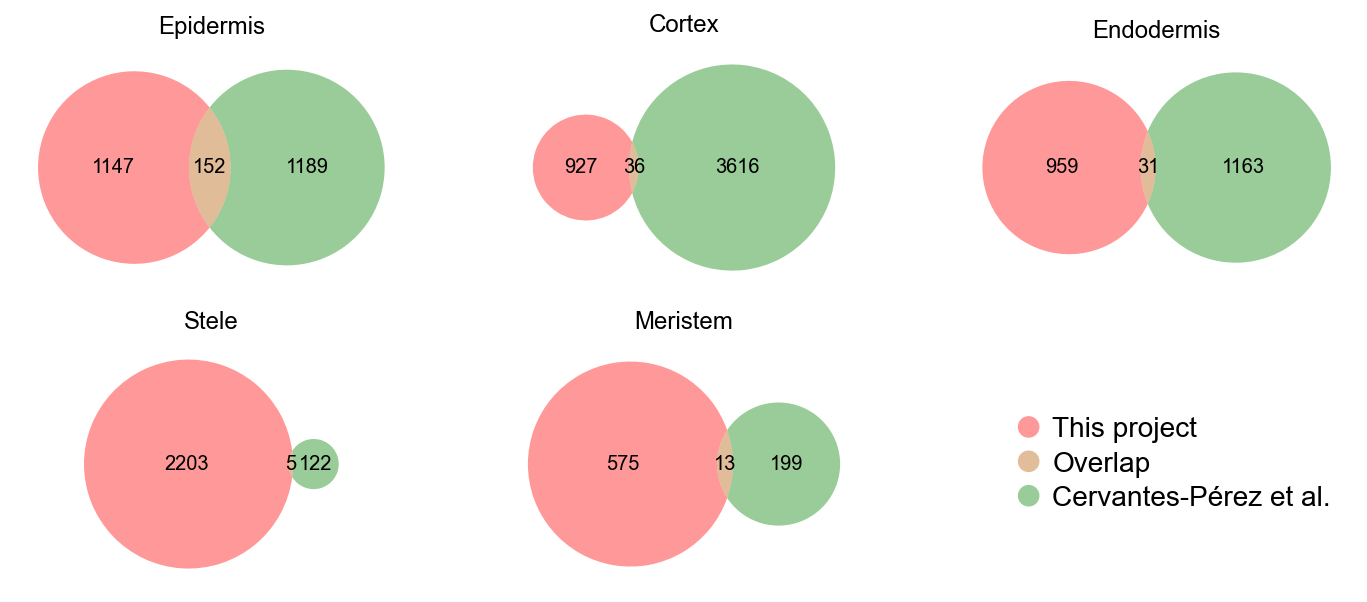

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 5))
axs = axs.flatten()
for i, ct in enumerate(["Epidermis", "Cortex", "Endodermis", "Stele", "Meristem"]):
    ax = axs[i]
    ls_1 = df_responseGeneVersus0hpiUpDegsMerged.query("celltype == @ct")["gene"] >> F(
        set
    )
    ls_2 = df_diffGeneMpUpCellType.query("celltype == @ct")["GeneV4"] >> F(set)
    matplotlib_venn.venn2([ls_1, ls_2], ["", ""], ax=ax)
    ax.set_title(
        ct,
    )
ax = axs[-1]
ax.remove()
ax = axs[-2]
legendkit.cat_legend(
    ax=ax,
    colors=["#FF9999", "#E1BD99", "#99CC99"],
    labels=["This project", "Overlap", "Cervantes-Pérez et al."],
    handle="circle",
    fontsize=14,
    loc="out right center",
    borderaxespad=5,
)
# fig.tight_layout()

In [ ]:
import venn

Text(0.5, 0.98, 'Up-regulated genes')

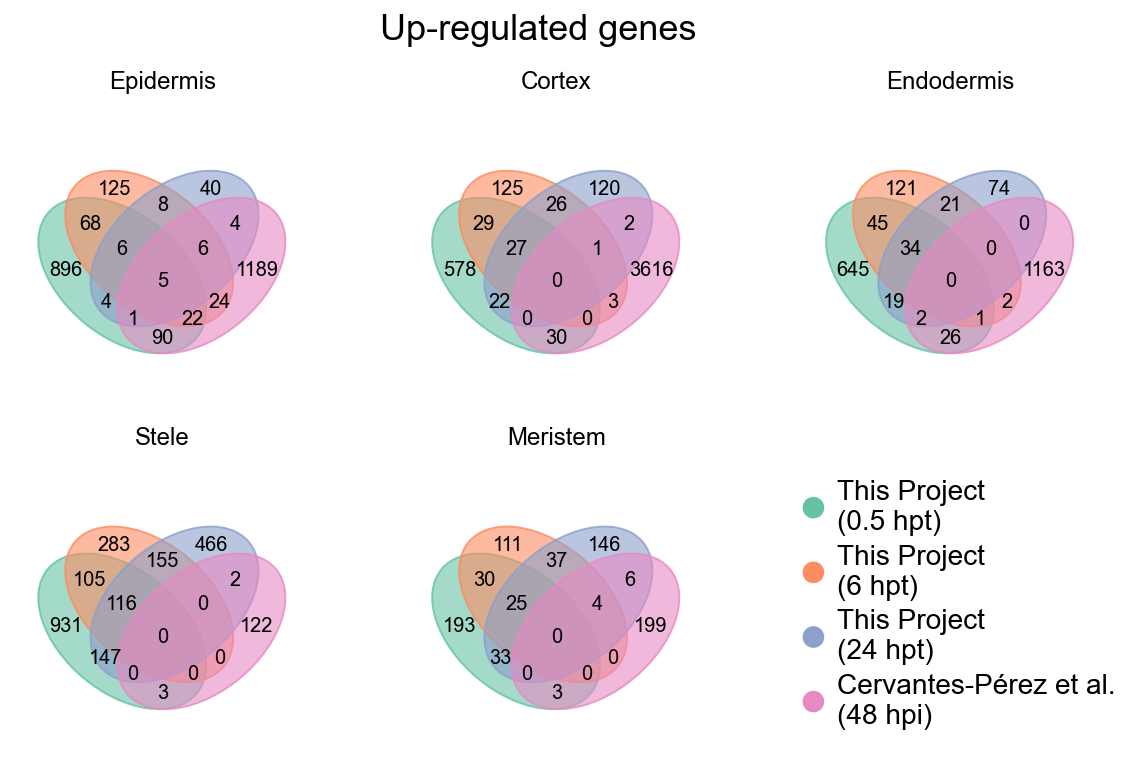

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten()
for i, ct in enumerate(["Epidermis", "Cortex", "Endodermis", "Stele", "Meristem"]):
    ax = axs[i]
    ls_1 = df_responseGeneVersus0hpiUpDegsMerged.query(
        "celltype == @ct & sample == '0.5 hpi'"
    )["gene"] >> F(set)
    ls_2 = df_responseGeneVersus0hpiUpDegsMerged.query(
        "celltype == @ct & sample == '6 hpi'"
    )["gene"] >> F(set)
    ls_3 = df_responseGeneVersus0hpiUpDegsMerged.query(
        "celltype == @ct & sample == '24 hpi'"
    )["gene"] >> F(set)
    ls_4 = df_diffGeneMpUpCellType.query("celltype == @ct")["GeneV4"] >> F(set)
    venn.venn(
        {
            "This Project\n(0.5 hpt)": ls_1,
            "This Project\n(6 hpt)": ls_2,
            "This Project\n(24 hpt)": ls_3,
            "Cervantes-Pérez et al.\n(48 hpi)": ls_4,
        },
        ax=ax,
        cmap=sns.palettes.color_palette("Set2", 4),
        alpha=0.6,
        legend_loc=None,
        fontsize=10,
    )
    ax.set_title(
        ct,
    )
ax = axs[-1]
ax.remove()
ax = axs[-2]
legendkit.cat_legend(
    ax=ax,
    colors=sns.palettes.color_palette("Set2", 4),
    labels=[
        "This Project\n(0.5 hpt)",
        "This Project\n(6 hpt)",
        "This Project\n(24 hpt)",
        "Cervantes-Pérez et al.\n(48 hpi)",
    ],
    handle="circle",
    fontsize=14,
    loc="out right center",
    borderaxespad=3,
)
fig.suptitle("Up-regulated genes", fontsize=18, ha="center")
# fig.tight_layout()

### for down

In [ ]:
df_responseGeneVersus0hpi = ad.uns["responseGenesVs0hpi"]

In [ ]:
df_responseGeneVersus0hpi = df_responseGeneVersus0hpi.query("coef_sd > 2.222759e-162")

In [ ]:
df_responseGeneVersus0hpiDownDegs = df_responseGeneVersus0hpi.query(
    "qval < 0.05 & log2fc < -1"
).assign(category="Down-regulated genes")

In [ ]:
df_responseGeneVersus0hpiDownDegs = ad.uns["responseGenesVs0hpiDown"]

In [ ]:
df_diffGeneMpDownForCompare = (
    df_diffGeneMpDown.dropna(subset=["GeneV4"])[["GeneV4", "Cluster"]]
    .assign(sample="48 hpi", project="Cervantes-Pérez et al.")
    .rename({"GeneV4": "gene", "Cluster": "cluster"}, axis=1)
)

In [ ]:
df_responseGeneVersus0hpiDownDegsForCompare = df_responseGeneVersus0hpiDownDegs[
    ["gene", "sample", "cluster"]
].assign(sample=lambda x: x["sample"].str.replace("hpi", "hpt"), project="Our data")

In [ ]:
df_diffGeneDownForCompare = pd.concat(
    [df_responseGeneVersus0hpiDownDegsForCompare, df_diffGeneMpDownForCompare]
).reset_index(drop=True)

In [ ]:
df_diffGeneDownForCompare["cluster-sample"] = (
    df_diffGeneDownForCompare["cluster"] + "-" + df_diffGeneDownForCompare["sample"]
)

In [ ]:
from itertools import product

ls_compareUsedCluster = df_diffGeneDownForCompare["cluster-sample"].unique()
df_specGeneDownOverlap = pd.DataFrame(
    index=ls_compareUsedCluster, columns=ls_compareUsedCluster
)
for x, y in product(ls_compareUsedCluster, ls_compareUsedCluster):
    if x == y:
        df_specGeneDownOverlap.loc[x, y] = 0.0
    else:
        df_specGeneDownOverlap.loc[x, y] = len(
            set(df_diffGeneDownForCompare.query("`cluster-sample` == @x")["gene"])
            & set(df_diffGeneDownForCompare.query("`cluster-sample` == @y")["gene"])
        ) / len(set(df_diffGeneDownForCompare.query("`cluster-sample` == @y")["gene"]))

In [ ]:
df_specGeneDownOverlap = df_specGeneDownOverlap.astype(float)

In [ ]:
_ls = ["7 Unknown-0.5 hpt", "7 Unknown-6 hpt", "7 Unknown-24 hpt", "8-48 hpi"]
df_specGeneDownOverlap = df_specGeneDownOverlap.loc[
    lambda x: ~x.index.isin(_ls), lambda x: ~x.index.isin(_ls)
]

In [ ]:
ls_project = ["Our data"] * 21 + ["Cervantes-Pérez et al."] * 23

In [ ]:
ls_timepoint = [
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
    "0.5 hpt",
    "6 hpt",
    "24 hpt",
] + ["48 hpi"] * 23

In [ ]:
ls_celltype = [
    "Epidermis",
    "Epidermis",
    "Epidermis",
    "Stele",
    "Stele",
    "Stele",
    "Cortex",
    "Cortex",
    "Cortex",
    "Stele",
    "Stele",
    "Stele",
    "Endodermis",
    "Endodermis",
    "Endodermis",
    "Meristem",
    "Meristem",
    "Meristem",
    "Stele",
    "Stele",
    "Stele",
    "Epidermis",
    "Epidermis",
    "Epidermis",
    "Epidermis",
    "Epidermis",
    "Cortex",
    "Cortex",
    "Meristem",
    "Cortex",
    "Cortex",
    "Cortex",
    "Cortex",
    "Endodermis",
    "Endodermis",
    "Endodermis",
    "Endodermis",
    "Endodermis",
    "Stele",
    "Stele",
    "Stele",
    "Stele",
    "Stele",
    "Stele",
]

#### merge cell type

In [ ]:
df_responseGeneVersus0hpiDownDegsMerged = df_responseGeneVersus0hpiDownDegs.assign(
    celltype=lambda x: x.cluster.str.split(" ").str[-1]
).query("celltype != 'Unknown'")

In [ ]:
import matplotlib_venn
import legendkit

<ListLegend>

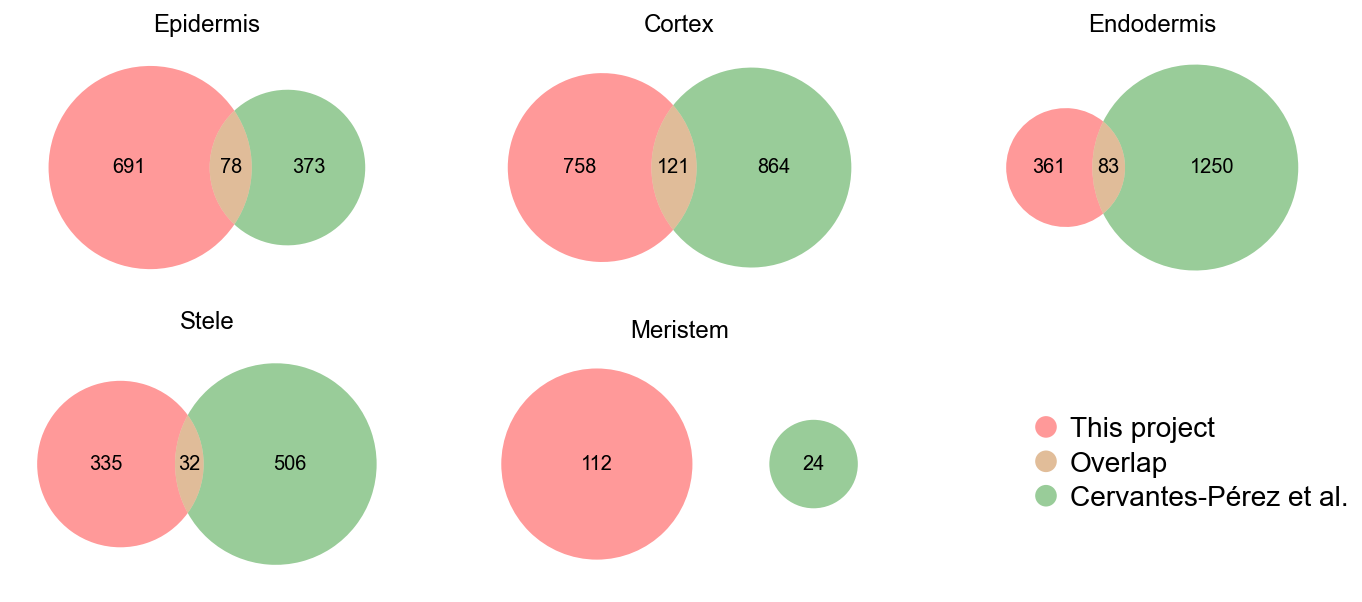

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 5))
axs = axs.flatten()
for i, ct in enumerate(["Epidermis", "Cortex", "Endodermis", "Stele", "Meristem"]):
    ax = axs[i]
    ls_1 = df_responseGeneVersus0hpiDownDegsMerged.query("celltype == @ct")[
        "gene"
    ] >> F(set)
    ls_2 = df_diffGeneMpDownCellType.query("celltype == @ct")["GeneV4"] >> F(set)
    matplotlib_venn.venn2([ls_1, ls_2], ["", ""], ax=ax)
    ax.set_title(
        ct,
    )
ax = axs[-1]
ax.remove()
ax = axs[-2]
legendkit.cat_legend(
    ax=ax,
    colors=["#FF9999", "#E1BD99", "#99CC99"],
    labels=["This project", "Overlap", "Cervantes-Pérez et al."],
    handle="circle",
    fontsize=14,
    loc="out right center",
    borderaxespad=5,
)
# fig.tight_layout()

In [ ]:
import venn

Text(0.5, 0.98, 'Down-regulated genes')

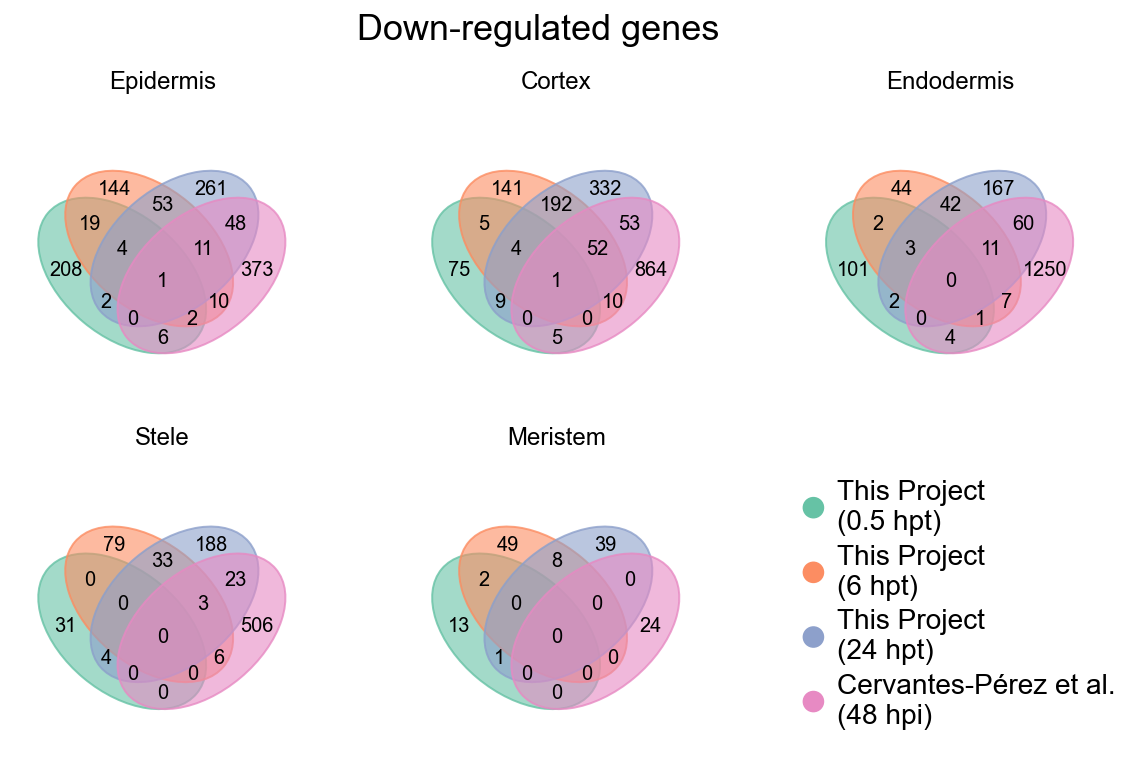

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten()
for i, ct in enumerate(["Epidermis", "Cortex", "Endodermis", "Stele", "Meristem"]):
    ax = axs[i]
    ls_1 = df_responseGeneVersus0hpiDownDegsMerged.query(
        "celltype == @ct & sample == '0.5 hpi'"
    )["gene"] >> F(set)
    ls_2 = df_responseGeneVersus0hpiDownDegsMerged.query(
        "celltype == @ct & sample == '6 hpi'"
    )["gene"] >> F(set)
    ls_3 = df_responseGeneVersus0hpiDownDegsMerged.query(
        "celltype == @ct & sample == '24 hpi'"
    )["gene"] >> F(set)
    ls_4 = df_diffGeneMpDownCellType.query("celltype == @ct")["GeneV4"] >> F(set)
    venn.venn(
        {
            "This Project\n(0.5 hpt)": ls_1,
            "This Project\n(6 hpt)": ls_2,
            "This Project\n(24 hpt)": ls_3,
            "Cervantes-Pérez et al.\n(48 hpi)": ls_4,
        },
        ax=ax,
        cmap=sns.palettes.color_palette("Set2", 4),
        alpha=0.6,
        legend_loc=None,
        fontsize=10,
    )
    ax.set_title(
        ct,
    )
ax = axs[-1]
ax.remove()
ax = axs[-2]
legendkit.cat_legend(
    ax=ax,
    colors=sns.palettes.color_palette("Set2", 4),
    labels=[
        "This Project\n(0.5 hpt)",
        "This Project\n(6 hpt)",
        "This Project\n(24 hpt)",
        "Cervantes-Pérez et al.\n(48 hpi)",
    ],
    handle="circle",
    fontsize=14,
    loc="out right center",
    borderaxespad=3,
)
fig.suptitle("Down-regulated genes", fontsize=18, ha="center")
# fig.tight_layout()

# compare mp with pc

In [ ]:
dt_upTpc = {}
for sheetName in ["1 day Up", "3 day up", "5 day up"]:
    if sheetName == "1 day Up":
        skiprows = 14
    else:
        skiprows = 11
    df_breakspear = pd.read_excel(
        "/data/Zhaijx/liuzj/projects/singleCell/medicagoTruncatula/04_data/bulk_degs/Breakspear_roothair_microarray.xlsx",
        sheet_name=sheetName,
        skiprows=skiprows,
    )
    df_breakspear["mtr"] = df_breakspear["Gene model"].copy()

    df_breakspear["mtr"] = (
        df_breakspear["mtr"]
        .str.split("///")
        .str[0]
        .str.split(r"|")
        .str[1]
        .str.split(".")
        .str[0]
        .str.replace("Medtr", "MTR_")
    )
    df_breakspear = df_breakspear.dropna(subset=["Gene model"])
    dt_upTpc[sheetName.lower()] = df_breakspear["mtr"].to_list()

In [ ]:
df_breakspear = pd.read_excel(
    "/data/Zhaijx/liuzj/projects/singleCell/medicagoTruncatula/04_data/bulk_degs/Breakspear_roothair_microarray.xlsx",
    sheet_name="NF up",
)

In [ ]:
df_breakspear = pd.read_excel(
    "/data/Zhaijx/liuzj/projects/singleCell/medicagoTruncatula/04_data/bulk_degs/Breakspear_roothair_microarray.xlsx",
    sheet_name="NF up",
)
df_breakspear["mtr"] = df_breakspear["Gene model"].copy()
df_breakspear["mtr"] = (
    df_breakspear["mtr"]
    .str.split("///")
    .str[0]
    .str.split(r"|")
    .str[1]
    .str.split(".")
    .str[0]
    .str.replace("Medtr", "MTR_")
)
df_breakspear = df_breakspear.dropna(subset=["Gene model"])
df_breakspear["mtr"] = (
    df_breakspear["Gene model"]
    .str.split("///")
    .str[0]
    .str.split(r"|")
    .str[1]
    .str.split(".")
    .str[0]
    .str.replace("Medtr", "MTR_")
)

In [ ]:
dt_upTpc["1 day NF up"] = df_breakspear["mtr"].to_list()

Text(0.5, 0.98, 'Up-regulated genes')

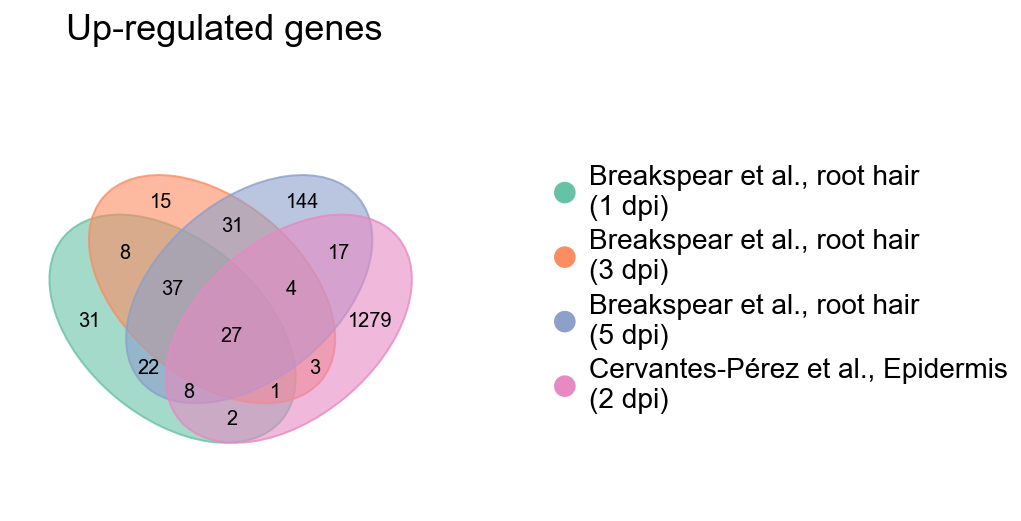

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ct = "Epidermis"
ls_1 = dt_upTpc["1 day up"] >> F(set)
ls_2 = dt_upTpc["3 day up"] >> F(set)
ls_3 = dt_upTpc["5 day up"] >> F(set)
ls_4 = df_diffGeneMpUpCellType.query("celltype == @ct")["GeneV4"] >> F(set)
venn.venn(
    {
        "TPC, root hair\n(1 dpi)": ls_1,
        "TPC, root hair\n(2 dpi)": ls_2,
        "TPC, root hair\n(3 dpi)": ls_3,
        "Cervantes-Pérez et al.\n(2 dpi)": ls_4,
    },
    ax=ax,
    cmap=sns.palettes.color_palette("Set2", 4),
    alpha=0.6,
    legend_loc=None,
    fontsize=10,
)

legendkit.cat_legend(
    ax=ax,
    colors=sns.palettes.color_palette("Set2", 4),
    labels=[
        "Breakspear et al., root hair\n(1 dpi)",
        "Breakspear et al., root hair\n(3 dpi)",
        "Breakspear et al., root hair\n(5 dpi)",
        "Cervantes-Pérez et al., Epidermis\n(2 dpi)",
    ],
    handle="circle",
    fontsize=14,
    loc="out right center",
    borderaxespad=3,
)
fig.suptitle("Up-regulated genes", fontsize=18, ha="center")

In [ ]:
dt_downTpc = {}
for sheetName in ["1 day down", "3 day down", "5 day down"]:
    if sheetName == "1 day Up":
        skiprows = 14
    else:
        skiprows = 11
    df_breakspear = pd.read_excel(
        "/data/Zhaijx/liuzj/projects/singleCell/medicagoTruncatula/04_data/bulk_degs/Breakspear_roothair_microarray.xlsx",
        sheet_name=sheetName,
        skiprows=skiprows,
    )
    df_breakspear["mtr"] = df_breakspear["Gene model"].copy()

    df_breakspear["mtr"] = (
        df_breakspear["mtr"]
        .str.split("///")
        .str[0]
        .str.split(r"|")
        .str[1]
        .str.split(".")
        .str[0]
        .str.replace("Medtr", "MTR_")
    )
    df_breakspear = df_breakspear.dropna(subset=["Gene model"])
    dt_downTpc[sheetName.lower()] = df_breakspear["mtr"].to_list()

Text(0.5, 0.98, 'Down-regulated genes')

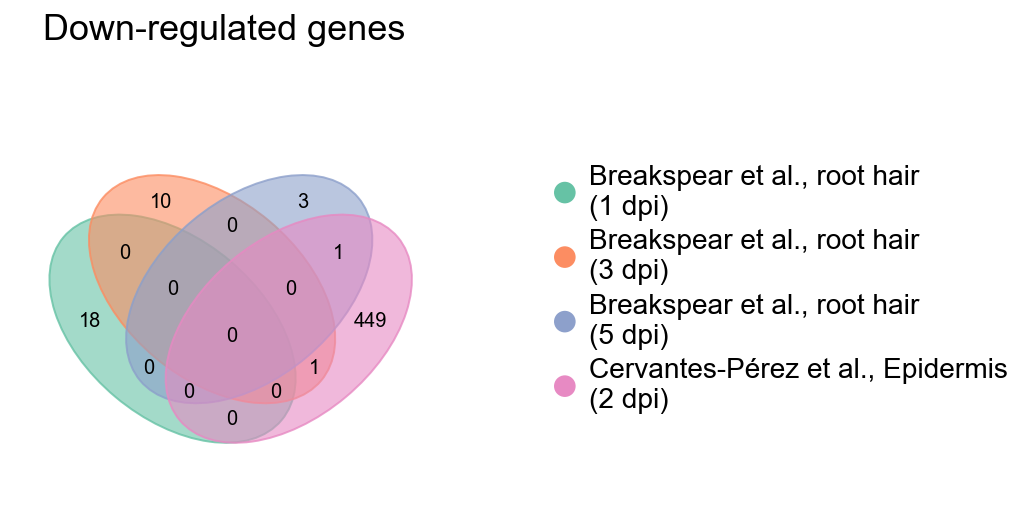

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ct = "Epidermis"
ls_1 = dt_downTpc["1 day down"] >> F(set)
ls_2 = dt_downTpc["3 day down"] >> F(set)
ls_3 = dt_downTpc["5 day down"] >> F(set)
ls_4 = df_diffGeneMpDownCellType.query("celltype == @ct")["GeneV4"] >> F(set)
venn.venn(
    {
        "TPC, root hair\n(1 dpi)": ls_1,
        "TPC, root hair\n(2 dpi)": ls_2,
        "TPC, root hair\n(3 dpi)": ls_3,
        "Cervantes-Pérez et al.\n(2 dpi)": ls_4,
    },
    ax=ax,
    cmap=sns.palettes.color_palette("Set2", 4),
    alpha=0.6,
    legend_loc=None,
    fontsize=10,
)

legendkit.cat_legend(
    ax=ax,
    colors=sns.palettes.color_palette("Set2", 4),
    labels=[
        "Breakspear et al., root hair\n(1 dpi)",
        "Breakspear et al., root hair\n(3 dpi)",
        "Breakspear et al., root hair\n(5 dpi)",
        "Cervantes-Pérez et al., Epidermis\n(2 dpi)",
    ],
    handle="circle",
    fontsize=14,
    loc="out right center",
    borderaxespad=3,
)
fig.suptitle("Down-regulated genes", fontsize=18, ha="center")